<a href="https://colab.research.google.com/github/KPxto/bootcamp-alura/blob/master/Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>COVID NO ESTADO DA BAHIA</center> 
>**Autor: Kaio Peixoto**

- [Linkedin](https://www.linkedin.com/in/kaiopeixoto/)
- [Github](https://github.com/KPxto)

<br>

Este notebook analisa os dados da COVID-19 disponibilizados pelo portal Brasil.io através deste [link](https://brasil.io/dataset/covid19/caso/). 
<br>

Os dados são apresentados diariamente pelas secretarias estaduais e municipais de saúde e coletados/compilados pela equipe de voluntarios do Brasil.io.
<br>

Este estudo visa analisar especificamente a situação do estado da Bahia e suas microrregiões, ou, regiões intermediárias e imediatas. Segundo o IBGE, as microrregiões *"são agrupamentos de regiões imediatas que são articuladas através da influência de uma metrópole, capital regional ou centro urbano representativo dentro do conjunto"*.

Dentro de um mesmo estado podem existir realidades bem distintas entre as subdivisões. Para um estado de grandes proporções como a Bahia pode ser mais interessante analisarmos cada região dessa para que o governo estadual possa alocar recursos onde mais se precisa, atuando efetivamente contra os efeitos da pandemia.
<br>

O IBGE dividiu a Bahia em 32 regiões intermediárias e imediatas e nosso estudo vai se basear fazendo um comparativo entre as mesmas.

No entanto, antes de dar um zoom em cada subdivisão da Bahia, vamos contextulizar a situação nacional fazendo os seguintes comparativos: 

    1. entre as 5 regiões do Brasil;
    2. entre os estados do Nordeste;
    
Os indicadores comparados serão:

    1. confirmados por 100 mil;
    2. óbitos por 100 mil;
    3. taxa de mortalidade; 

A divisão por 100 mil habitantes facilita um comparativo mais justo respeitando as devidas proporcionalidades.

Ou seja, faremos um zoom de forma gradual começando no cenário nacional até chegar nas microrregiões da Bahia.

## Resumo:

Questões e hipóteses:

- Como a pandemia tem se comportado dentre as diferentes microrregiões da Bahia?
- Quantos confirmados a cada 100 mil e qual a mortalidade da doença?
- O índice de mortalidade está relacionado com o nível de gasto na saúde por região? **(verificar se tem dados para validar essa hipotese)**
- Os maiores picos da doença ocorreram na mesma época em todas regiões ou em momentos diferentes?
- Qual microrregião está mais preparada e menos preparada para uma possível segunda onda da doença?
- Onde estão as cidades em que a doença foi mais controlada?
- Como Salvador tem respondido à pandemia em relação às outras capitais do nordeste?
- Tirar a media de cada regiao considerando somente as capitais e fazer um comparativo
- Fazer uma distribuicao da população das cidades da Bahia cujo óbito por covid foi zero
- Primeiro vamos comparar os numeros da Bahia com os dos outros estados do NE e tbm do Brasil
- Calcular a media movel

## Cidades e microrregiões

De início, vamos logo organizar as subdivisões da Bahia em listas com suas respectivas cidades.

In [1]:
# foram copiadas do wikipedia as informações de cada cidade e sua respectiva microrregião
# para transformar as cidades numa lista, aplicamos o metodo split
# o nome da lista corresponde ao nome da microrregião

b='''Baianópolis
Barreiras
Catolândia
Formosa do Rio Preto
Luís Eduardo Magalhães
Riachão das Neves
São Desidério'''

barreiras = b.split('\n')

c='''Angical
Brejolândia
Cotegipe
Cristópolis
Mansidão
Santa Rita de Cássia
Tabocas do Brejo Velho
Wanderley'''

cotegipe = c.split('\n')

smv='''Canápolis
Cocos
Coribe
Correntina
Jaborandi
Santa Maria da Vitória
Santana
São Félix do Coribe
Serra Dourada'''

sta_maria_vit = smv.split('\n')

j='''Campo Alegre de Lourdes
Casa Nova
Curaçá
Juazeiro
Pilão Arcado
Remanso
Sento Sé
Sobradinho'''

juazeiro = j.split('\n')

pa='''Abaré
Chorrochó
Glória
Macururé
Paulo Afonso
Rodelas'''

paulo_afonso = pa.split('\n')

barra='''Barra
Buritirama
Ibotirama
Itaguaçu da Bahia
Morpará
Muquém do São Francisco
Xique-Xique'''

barra = barra.split('\n')

bj='''Bom Jesus da Lapa
Carinhanha
Feira da Mata
Paratinga
Serra do Ramalho
Sítio do Mato'''

bom_jesus_lapa = bj.split('\n')

sdb='''Andorinha
Antônio Gonçalves
Campo Formoso
Filadélfia
Itiúba
Jaguarari
Pindobaçu
Senhor do Bonfim
Umburanas'''

senhor_bonfim = sdb.split('\n')

ir='''América Dourada
Barra do Mendes
Barro Alto
Cafarnaum
Canarana
Central
Gentio do Ouro
Ibipeba
Ibititá
Iraquara
Irecê
João Dourado
Jussara
Lapão
Mulungu do Morro
Presidente Dutra
São Gabriel
Souto Soares
Uibaí'''

irece = ir.split('\n')

jac='''Caém
Caldeirão Grande
Capim Grosso
Jacobina
Miguel Calmon
Mirangaba
Morro do Chapéu
Ourolândia
Piritiba
Ponto Novo
Quixabeira
São José do Jacuípe
Saúde
Serrolândia
Várzea do Poço
Várzea Nova'''

jacobina = jac.split('\n')

itab='''Baixa Grande
Boa Vista do Tupim
Iaçu
Ibiquera
Itaberaba
Lajedinho
Macajuba
Mairi
Mundo Novo
Ruy Barbosa
Tapiramutá
Várzea da Roça'''

itaberada = itab.split('\n')

fs='''Água Fria
Anguera
Antônio Cardoso
Conceição da Feira
Conceição do Jacuípe
Coração de Maria
Elísio Medrado
Feira de Santana
Ipecaetá
Ipirá
Irará
Itatim
Ouriçangas
Pedrão
Pintadas
Rafael Jambeiro
Santa Bárbara
Santa Teresinha
Santanópolis
Santo Estêvão
São Gonçalo dos Campos
Serra Preta
Tanquinho
Teodoro Sampaio'''

feira_santana = fs.split('\n')

jer='''Coronel João Sá
Jeremoabo
Pedro Alexandre
Santa Brígida
Sítio do Quinto'''

jeremoabo = jer.split('\n')

euc='''Cansanção
Canudos
Euclides da Cunha
Monte Santo
Nordestina
Queimadas
Quijingue
Tucano
Uauá'''

euclides_cunha = euc.split('\n')

rp='''Adustina
Antas
Banzaê
Cícero Dantas
Cipó
Fátima
Heliópolis
Itapicuru
Nova Soure
Novo Triunfo
Olindina
Paripiranga
Ribeira do Amparo
Ribeira do Pombal'''

rib_pombal = rp.split('\n')

ser='''Araci
Barrocas
Biritinga
Candeal
Capela do Alto Alegre
Conceição do Coité
Gavião
Ichu
Lamarão
Nova Fátima
Pé de Serra
Retirolândia
Riachão do Jacuípe
Santaluz
São Domingos
Serrinha
Teofilândia
Valente'''

serrinha = ser.split('\n')

ala='''Acajutiba
Alagoinhas
Aporá
Araçás
Aramari
Crisópolis
Inhambupe
Rio Real
Sátiro Dias'''

alagoinhas = ala.split('\n')

entre='''Cardeal da Silva
Conde
Entre Rios
Esplanada
Jandaíra'''

entre_rios = entre.split('\n')

catu='''Amélia Rodrigues
Catu
Itanagra
Mata de São João
Pojuca
São Sebastião do Passé
Terra Nova'''

catu = catu.split('\n')

saj='''Aratuípe
Cabaceiras do Paraguaçu
Cachoeira
Castro Alves
Conceição do Almeida
Cruz das Almas
Dom Macedo Costa
Governador Mangabeira
Jaguaripe
Maragogipe
Muniz Ferreira
Muritiba
Nazaré
Salinas da Margarida
Santo Amaro
Santo Antônio de Jesus
São Felipe
São Félix
Sapeaçu
Saubara
Varzedo'''

sto_antonio = saj.split('\n')

ssa='''Camaçari
Candeias
Dias d'Ávila
Itaparica
Lauro de Freitas
Madre de Deus
Salvador
São Francisco do Conde
Simões Filho
Vera Cruz'''

salvador = ssa.split('\n')

boq='''Boquira
Botuporã
Brotas de Macaúbas
Caturama
Ibipitanga
Ibitiara
Ipupiara
Macaúbas
Novo Horizonte
Oliveira dos Brejinhos
Tanque Novo'''

boquira = boq.split('\n')

sea='''Abaíra
Andaraí
Barra da Estiva
Boninal
Bonito
Contendas do Sincorá
Ibicoara
Itaeté
Jussiape
Lençóis
Mucugê
Nova Redenção
Palmeiras
Piatã
Rio de Contas
Seabra
Utinga
Wagner'''

seabra = sea.split('\n')

jeq='''Aiquara
Amargosa
Apuarema
Brejões
Cravolândia
Irajuba
Iramaia
Itagi
Itaquara
Itiruçu
Jaguaquara
Jequié
Jiquiriçá
Jitaúna
Lafaiete Coutinho
Laje
Lajedo do Tabocal
Maracás
Marcionílio Souza
Milagres
Mutuípe
Nova Itarana
Planaltino
Santa Inês
São Miguel das Matas
Ubaíra'''

jequie = jeq.split('\n')

livbru='''Dom Basílio
Érico Cardoso
Livramento de Nossa Senhora
Paramirim
Rio do Pires'''

liv_brumado = livbru.split('\n')

gbi='''Caculé
Caetité
Candiba
Guanambi
Ibiassucê
Igaporã
Iuiu
Jacaraci
Lagoa Real
Licínio de Almeida
Malhada
Matina
Mortugaba
Palmas de Monte Alto
Pindaí
Riacho de Santana
Sebastião Laranjeiras
Urandi'''

guanambi = gbi.split('\n')

bru='''Aracatu
Brumado
Caraíbas
Condeúba
Cordeiros
Guajeru
Ituaçu
Maetinga
Malhada de Pedras
Piripá
Presidente Jânio Quadros
Rio do Antônio
Tanhaçu
Tremedal'''

brumado = bru.split('\n')

vdc='''Anagé
Barra do Choça
Belo Campo
Boa Nova
Bom Jesus da Serra
Caatiba
Caetanos
Cândido Sales
Dário Meira
Ibicuí
Iguaí
Manoel Vitorino
Mirante
Nova Canaã
Planalto
Poções
Vitória da Conquista'''

vit_conquista = vdc.split('\n')

itap='''Encruzilhada
Itambé
Itapetinga
Itarantim
Itororó
Macarani
Maiquinique
Potiraguá
Ribeirão do Largo'''

itapetinga = itap.split('\n')

val='''Cairu
Camamu
Igrapiúna
Ituberá
Maraú
Nilo Peçanha
Piraí do Norte
Presidente Tancredo Neves
Taperoá
Valença'''

valenca = val.split('\n')

iositb='''Almadina
Arataca
Aurelino Leal
Barra do Rocha
Barro Preto
Belmonte
Buerarema
Camacan
Canavieiras
Coaraci
Firmino Alves
Floresta Azul
Gandu
Gongogi
Ibicaraí
Ibirapitanga
Ibirataia
Ilhéus
Ipiaú
Itabuna
Itacaré
Itagibá
Itaju do Colônia
Itajuípe
Itamari
Itapé
Itapebi
Itapitanga
Jussari
Mascote
Nova Ibiá
Pau Brasil
Santa Cruz da Vitória
Santa Luzia
São José da Vitória
Teolândia
Ubaitaba
Ubatã
Una
Uruçuca
Wenceslau Guimarães'''

ios_itabuna = iositb.split('\n')

pseg='''Alcobaça
Caravelas
Eunápolis
Guaratinga
Ibirapuã
Itabela
Itagimirim
Itamaraju
Itanhém
Jucuruçu
Lajedão
Medeiros Neto
Mucuri
Nova Viçosa
Porto Seguro
Prado
Santa Cruz Cabrália
Teixeira de Freitas
Vereda'''

porto_seguro = pseg.split('\n')

## Importando Bibliotecas e Preparando Notebook

In [719]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import TimestampedGeoJson
from branca.element import Figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# escolhendo estilo de plotagem
plt.style.use('fivethirtyeight')

# setando opção de visualização do número
pd.options.display.float_format = '{:.2f}'.format

## Carregando nosso dataframe

    - Para a coluna 'city', os valores nulos vem como NA ou 'Importados/Indefinidos'
    - Para facilitar nosso trabalho de limpeza configuramos o pandas para que considere como NA todos valores descritos 'Importados/Indefinidos' na coluna 'city'

In [418]:
df = pd.read_csv('caso.csv.gz', na_values=['Importados/Indefinidos'])

In [419]:
# vamos pegar 5 dados aleatorios para conhecer nosso conjunto de dados
df.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
20847,2020-12-07,AM,Santo Antônio do Içá,city,1337,28,256,False,21602.00,21243.00,1303700.00,6293.84,0.02
352699,2020-07-21,PA,São João de Pirabas,city,176,16,89,False,23045.00,23244.00,1507474.00,757.18,0.09
457636,2020-11-13,MG,Paraguaçu,city,179,4,170,False,21513.00,21605.00,3147204.00,828.51,0.02
1070182,2020-11-24,SP,Nipoã,city,117,2,190,False,5213.00,5298.00,3532702.00,2208.38,0.02
889028,2020-10-23,TO,Palmeirante,city,267,4,131,False,6026.00,6131.00,1715705.00,4354.92,0.01


<br>

## Para entender o dataset é interessante saber o que cada coluna está informando:
    -                           date: data da informação
    -                          state: unidade da federação
    -                           city: cidade
    -                     place_type: se aquela informação refere-se a estado ou cidade
    -                      confirmed: casos confirmados até aquela data
    -                         deaths: óbitos até aquela data
    -                order_for_place: número ordinal do boletim emitido
    -                        is_last: informa se aquele boletim é o último emitido para aquela localidade
    -      estimated_population_2019: população em 2019
    -           estimated_population: população estimada em 2020
    -                 city_ibge_code: código ibge para a cidade (útil para explorar base de dados do ibge)
    - confirmed_per_100k_inhabitants: mortes a cada 100 mil habitantes
    -                     death_rate: taxa de mortalidade (divide-se o total de óbitos pelo total de casos confirmados)

<br>

## Checando valores nulos e tipos de dados

Antes de verificarmos tipos de dados e valores nulos, vamos verificar o tamanho do nosso dataframe

In [72]:
print(f'Nosso dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

Nosso dataset tem 1128097 linhas e 13 colunas.


<br>
Desse total de linhas quantas são valores NA por coluna?

Vamos achar essa resposta com o codigo abaixo

In [73]:
df.isna().sum()

date                                  0
state                                 0
city                              11585
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          4342
estimated_population               4342
city_ibge_code                     4342
confirmed_per_100k_inhabitants    18005
death_rate                            0
dtype: int64

<br>
Agora veremos quantos valores válidos por coluna e seus respectivos tipos de dados

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128097 entries, 0 to 1128096
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   date                            1128097 non-null  object 
 1   state                           1128097 non-null  object 
 2   city                            1116512 non-null  object 
 3   place_type                      1128097 non-null  object 
 4   confirmed                       1128097 non-null  int64  
 5   deaths                          1128097 non-null  int64  
 6   order_for_place                 1128097 non-null  int64  
 7   is_last                         1128097 non-null  bool   
 8   estimated_population_2019       1123755 non-null  float64
 9   estimated_population            1123755 non-null  float64
 10  city_ibge_code                  1123755 non-null  float64
 11  confirmed_per_100k_inhabitants  1110092 non-null  float64
 12  

>A coluna **date** está como *string* e deverá ser convertida para tipo *data*

<br>

Conforme sugerido pela própria documentação para ser desconsiderada por possuir valores desatualizados, vamos excluir a coluna **estimated_population_2019**

In [75]:
df.drop('estimated_population_2019', axis=1, inplace=True)

Também vamos fazer a conversão da coluna **date**

In [76]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

Já que o dataset abrange até início de Dezembro vamos excluir este último mês do ano e pegar somente meses cheios, ou seja, até Novembro. Dessa forma evitamos distorções na visualização dos gráficos.

In [77]:
#df = df[df['date'].dt.month<=11]

<br>

## Separando Dataframes e Fazendo Ajustes...

Considerando que os valores NA da coluna **city** ocorrem quando o registro refere-se a estado (descrito como *state* na coluna **place_type**), vamos criar um dataframe somente para dados relacionados às cidades.

In [78]:
# vamos filtrar as linhas onde a coluna city não é nula e atribuí-la a variável df_cidade
df_cidade = df[df['city'].notnull()]
# uma amostra aleatório de 5 linhas
df_cidade.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
661803,2020-09-09,PR,Colombo,city,2968,112,170,False,246540.00,4105805.00,1203.86,0.04
961960,2020-10-07,RS,Poço das Antas,city,81,0,157,False,2101.00,4314753.00,3855.31,0.00
520326,2020-07-13,PE,Calumbi,city,38,1,43,False,5747.00,2603405.00,661.21,0.03
237858,2020-07-08,BA,Tanhaçu,city,0,0,41,False,20393.00,2931004.00,nan,0.00
403046,2020-07-03,MG,Dom Silvério,city,1,0,13,False,5232.00,3122702.00,19.11,0.00


<br>

Para provar que **df_cidade** traz somente dados das cidades vamos checar os valores únicos da coluna **place_type**

In [79]:
print(f"O unico valor presente na coluna place_type é --> '{df_cidade['place_type'].unique()[0]}'")

O unico valor presente na coluna place_type é --> 'city'


In [80]:
# excluindo a coluna place_type já que a mesma não faz mais sentido nesse dataframe
# tentei remover a coluna com drop, mas estava dando aviso de 'Setting copy with error'
# da maneira executada abaixo, parecido com dicionario, nao gerou alerta
del df_cidade['place_type']

Vamos identificar se sobrou valor nulo em algumas das colunas de **df_cidade**

In [81]:
df_cidade.isna().sum()

date                                  0
state                                 0
city                                  0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population                  0
city_ibge_code                        0
confirmed_per_100k_inhabitants    13657
death_rate                            0
dtype: int64

<br>

>Segundo documentação, a coluna **confirmed_per_100k_inhabitants** é calculada dividindo o número de casos confirmados por 100.000 (baseado em estimated_population). A nossa hipótese é que quando a coluna de casos confirmados for igual a 0 o resultado será um NaN. 

>Confirmando a hipótese, vamos consertar isso substituindo valores nulos pelo número 0, já que não houve morte.
Usaremos o método fillna()

<br>

- Primeiro criamos um df onde todos valores de 'confirmado por 100K' são nulos
- Depois confirmamos que o único valor da coluna casos cofirmados é 0
- Esse procedimento é útil para termos certeza da nossa hipótese

In [82]:
confirmado_por_100k = df_cidade[df_cidade['confirmed_per_100k_inhabitants'].isna()]
confirmado_por_100k['confirmed'].unique()

array([0], dtype=int64)

<br>
Usando o metodo fillna()

In [83]:
df_cidade['confirmed_per_100k_inhabitants'].fillna(0, inplace=True)

<br>

Se formos buscar os valores nulos novamente veremos que df_cidade está tudo em ordem

In [84]:
df_cidade.isna().sum()

date                              0
state                             0
city                              0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [85]:
df_cidade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116512 entries, 261 to 1128096
Data columns (total 11 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   date                            1116512 non-null  datetime64[ns]
 1   state                           1116512 non-null  object        
 2   city                            1116512 non-null  object        
 3   confirmed                       1116512 non-null  int64         
 4   deaths                          1116512 non-null  int64         
 5   order_for_place                 1116512 non-null  int64         
 6   is_last                         1116512 non-null  bool          
 7   estimated_population            1116512 non-null  float64       
 8   city_ibge_code                  1116512 non-null  float64       
 9   confirmed_per_100k_inhabitants  1116512 non-null  float64       
 10  death_rate                      1116512 

>Todas colunas com o mesmo número de não-nulos

<br>

In [86]:
# checando duplicidade
# nenhuma ocorrencia de valores duplicados
df_cidade.duplicated().value_counts()

False    1116512
dtype: int64

<br>

Criando a nova coluna de região

In [87]:
regiao = {'AC':'Norte', 'AM':'Norte', 'RR':'Norte', 'RO':'Norte', 'AP':'Norte', 'PA':'Norte', 'TO':'Norte',
          'MA':'Nordeste', 'PI':'Nordeste', 'CE':'Nordeste', 'RN':'Nordeste', 'PB':'Nordeste', 'PE':'Nordeste',
         'AL':'Nordeste', 'SE':'Nordeste', 'BA':'Nordeste', 'MG':'Sudeste', 'ES':'Sudeste', 'RJ':'Sudeste',
         'SP':'Sudeste', 'PR':'Sul', 'SC':'Sul', 'RS':'Sul', 'MS':'Centro-Oeste', 'GO':'Centro-Oeste', 
         'MT':'Centro-Oeste', 'DF':'Centro-Oeste'}

In [88]:
df_cidade['region'] = df_cidade['state'].map(regiao)

<br>

Considerando que o indicador 'is_last' traz as informações mais recentes sobre numero de mortes e casos confirmados, vamos criar um dataframe com esses dados. 
<br>

Sera útil para fazermos comparações entre as cidades.

In [89]:
# df considerando o ultimo boletim por cidade
df_cidade_last = df_cidade[df_cidade['is_last']==True]

In [90]:
# vamos separar cada cidade do nordeste em dataframes diferentes
# sera util para fazermos comparações regionais
cidades_ba = df_cidade[df_cidade['state']=='BA']
cidades_se = df_cidade[df_cidade['state']=='SE']
cidades_al = df_cidade[df_cidade['state']=='AL']
cidades_pe = df_cidade[df_cidade['state']=='PE']
cidades_pb = df_cidade[df_cidade['state']=='PB']
cidades_rn = df_cidade[df_cidade['state']=='RN']
cidades_ce = df_cidade[df_cidade['state']=='CE']
cidades_pi = df_cidade[df_cidade['state']=='PI']
cidades_ma = df_cidade[df_cidade['state']=='MA']

In [91]:
# separando somente cidades do Nordeste
ne = df_cidade[df_cidade['region']=='Nordeste']

In [92]:
# criando dataframe da regiao nordeste, mas excluindo o estado da Bahia
# sera util para comparações de estatísticas do restante do nordeste com a realidade na Bahia
ne_sem_ba = ne[ne['state']!='BA']
ne_grupo = ne_sem_ba[ne_sem_ba['is_last']==True].groupby('city').sum()
n = ne_grupo['confirmed_per_100k_inhabitants'].mean()

dados prontos para serem explorados.... :)

## <center>Gimme the Data...</center>

In [93]:
from IPython.display import Image

In [94]:
Image(url="https://media.giphy.com/media/4FQMuOKR6zQRO/giphy.gif")

<br>

## Análise Exploratória dos Dados

### Regiões do Brasil

Começaremos pelo comparativo entre as regiões do Brasil. Faremos aqui uma comparação rápida com o intuito de situar o Nordeste brasileiro diante o cenário nacional da pandemia. Nesta análise serão utilizados 3 indicadores básicos:
1. Confirmados por 100 mil
2. Óbitos por 100 mil
3. Taxa de mortalidade

In [95]:
regioes = df_cidade[df_cidade['is_last']==True].groupby('region').sum()[['confirmed', 'deaths', 'estimated_population']]
regioes['confirmed_per_100k'] = regioes['confirmed']/(regioes['estimated_population']/100000)
regioes['deaths_per_100k'] = regioes['deaths']/(regioes['estimated_population']/100000)
regioes['death_rate'] = (regioes['deaths']/regioes['confirmed'])*100
regioes

,confirmed,deaths,estimated_population,confirmed_per_100k,deaths_per_100k,death_rate
region,,,,,,
Centro-Oeste,766335,16232,16504303.00,4643.24,98.35,2.12
Nordeste,1682138,45124,57374243.00,2931.87,78.65,2.68
Norte,792176,17049,18672591.00,4242.45,91.30,2.15
Sudeste,2322554,81332,89011083.00,2609.29,91.37,3.50
Sul,1068042,18052,30192315.00,3537.46,59.79,1.69


#### Como está a situação do Nordeste comparando com as outras regiões do Brasil?

Para responder esta questão vamos fazer o comparativo no número de confirmados e de óbitos. Foi feita a análise por 100 mil habitantes. Dessa forma, obtemos uma análise fiel que observe as diferenças no número de habitantes de cada região, considerando as devidas proporções.  

In [96]:
# vamos criar uma função para facilitar na composição das cores dos gráficos
# as regiões destacadas são o nosso foco da análise

def cores_ne_ba(ax):
    l = []
    for i in ax:
        if i == 'Nordeste' or i == 'BA':
            l.append('k')
        else:
            l.append('tab:blue')
    return l

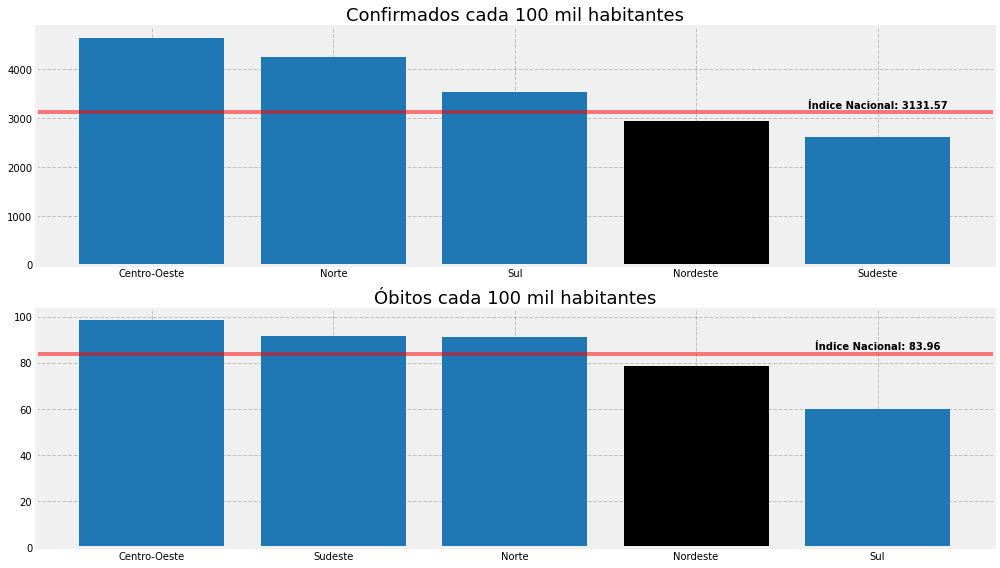

In [102]:
# antes vamos calcular os números nacionais para compararmos cada região
regioes_conf_por_100k = round((regioes['confirmed'].sum())/(regioes['estimated_population'].sum()/100000),2)
regioes_obitos_por_100k = round((regioes['deaths'].sum())/(regioes['estimated_population'].sum()/100000),2)
regioes_deathrate_total = round((regioes['deaths'].sum())/(regioes['confirmed'].sum()),2)*100


# dispondo as regiões do forma decrescente por ordem de confirmados cada 100 mil
regioes_confirmadopor100k_ordem = regioes.sort_values('confirmed_per_100k', ascending=False)
# dispondo as regiões do forma decrescente por ordem de óbitos cada 100 mil
regioes_obitopor100k_ordem = regioes.sort_values('deaths_per_100k', ascending=False)

# construindo os gráficos
fig, ax = plt.subplots(2, figsize=(14,8), tight_layout=True)

ax[0].bar(regioes_confirmadopor100k_ordem.index, regioes_confirmadopor100k_ordem['confirmed_per_100k'], 
          color=cores_ne_ba(regioes_confirmadopor100k_ordem.index))
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].axhline(regioes_conf_por_100k, color='red', alpha=.5)
ax[0].text('Sudeste', 3200, f'Índice Nacional: {round(regioes_conf_por_100k,2)}', fontweight='bold', ha='center')
ax[0].set_title('Confirmados cada 100 mil habitantes', fontsize=18)

ax[1].bar(regioes_obitopor100k_ordem.index, regioes_obitopor100k_ordem['deaths_per_100k'], 
          color=cores_ne_ba(regioes_obitopor100k_ordem.index))
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].axhline(regioes_obitos_por_100k, color='red', alpha=.5)
ax[1].text('Sul', 86, f'Índice Nacional: {round(regioes_obitos_por_100k,2)}', fontweight='bold', ha='center')
ax[1].set_title('Óbitos cada 100 mil habitantes', fontsize=18);

>Apesar de em números absolutos a região Nordeste figurar em segundo lugar para casos confirmados e óbitos, a região mostra-se como uma das menos afetadas quando na proporção por 100 mil habitantes. 
<br>

>O contrário é verdadeiro para as regiões Norte e Centro-Oeste, que figuram nas 2 últimas posições respectivamente em números absolutos, mas revelam uma situação preocupante quando considerados casos e óbitos por 100 mil habitantes. 

<br>

**Taxa de Mortalidade**
<br>

Mas, será que no índice de mortalidade esse quadro continua o mesmo? A taxa de mortalidade é calculada dividindo o número de óbitos pelo número de casos confirmados. É um indicador interessante, pois reflete na estrutura de saúde e atendimento de uma região. Ou seja, se mais pessoas morrem pode ser explicado pelo fato de a rede hospitalar da região não estar adequada para atender à demanda.

<br>

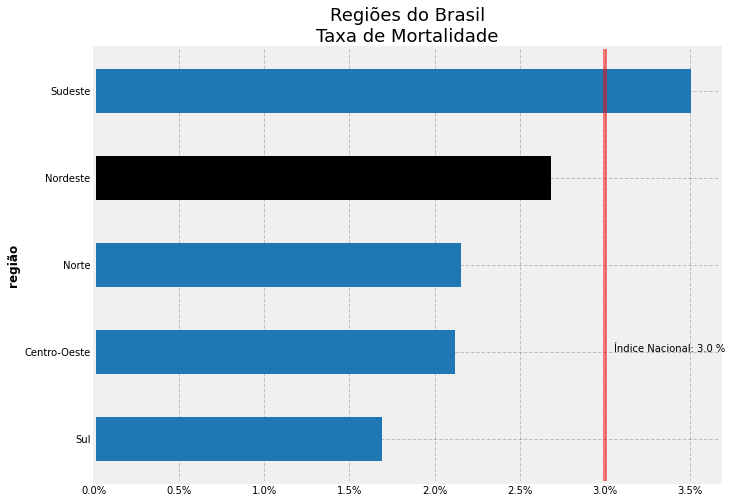

In [103]:
plt.figure(figsize=(10,8))
tx_obito_reg = regioes.sort_values('death_rate')['death_rate']
ax = tx_obito_reg.plot(kind='barh', color=cores_ne_ba(tx_obito_reg.index))
plt.title('Regiões do Brasil\nTaxa de Mortalidade', fontsize=18)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}%'))
ax.grid(ls='--', color='k', alpha=0.2)
ax.axvline(regioes_deathrate_total, color='red', alpha=0.5)
ax.text(3.05, 1, f'Índice Nacional: {regioes_deathrate_total} %', rotation=0)
plt.ylabel('região', fontweight='bold');

>No gráfico em barras horizontais acima vemos que o Nordeste é a segunda região com maior taxa de mortalidade. Isso pode ser interpretado como a região não está com a estrutura ideal para dar conta do número de casos confirmados. Para ilustrar, a região Sul tem número maior que o Nordeste em casos confirmados por 100 mil. No entanto, apresenta a menor taxa de mortalidade do país, revelando, possivelmente, uma estrutura hospitalar mais equipada.
<br>

>Devido ao fato de ser uma doença ainda sem cura, o atendimento médico-hospitalar imediato nas primeiras fases é a principal arma contra os efeitos da COVID-19 no pacientes, significando a diferença entre a vida e a morte. Sobre o Nordeste  e esse 'pulo' da região no último gráfico, será que toda a região manteve esse comportamento ou teve algum estado que 'puxou' os números para cima? E como a Bahia reagiu à pandemia nesse contexto?

### Estados do Nordeste


Dando mais um zoom na nossa análise e agora focando no Nordeste, vamos comparar os estados dessa região sob os mesmos indicadores. (alem disso, vamos levantar algumas hipoteses.

<br>

In [104]:
# vamos primeiros agrupar os estados nordestinos num unico dataframe
# depois vamos criar as colunas com os novos indicadores

ne_grupo = ne[ne['is_last']==True].groupby('state').sum()[['confirmed', 'deaths', 'estimated_population']]
ne_grupo['confirmed_per_100k'] = ne_grupo['confirmed']/(ne_grupo['estimated_population']/100000)
ne_grupo['deaths_per_100k'] = ne_grupo['deaths']/(ne_grupo['estimated_population']/100000)
ne_grupo['death_rate'] = (ne_grupo['deaths']/ne_grupo['confirmed'])*100
ne_grupo

,confirmed,deaths,estimated_population,confirmed_per_100k,deaths_per_100k,death_rate
state,,,,,,
AL,96624,2346,3351543.00,2882.97,70.00,2.43
BA,415920,8359,14930634.00,2785.68,55.99,2.01
CE,304942,9738,9187103.00,3319.24,106.00,3.19
MA,195589,4349,7114598.00,2749.12,61.13,2.22
PB,150575,3380,4039277.00,3727.77,83.68,2.24
PE,192397,9186,9616621.00,2000.67,95.52,4.77
PI,133336,2704,3281480.00,4063.29,82.40,2.03
RN,97581,2725,3534165.00,2761.08,77.10,2.79
SE,95174,2337,2318822.00,4104.41,100.78,2.46


<br>

Como estão os índices do Nordeste em confirmados e óbitos? Para compararmos estados tão diversos tanto em área geográfica como tamanho da população, é necessário fazer essa padronização para cada 100 mil habitantes. Veremos como os números se comportam.

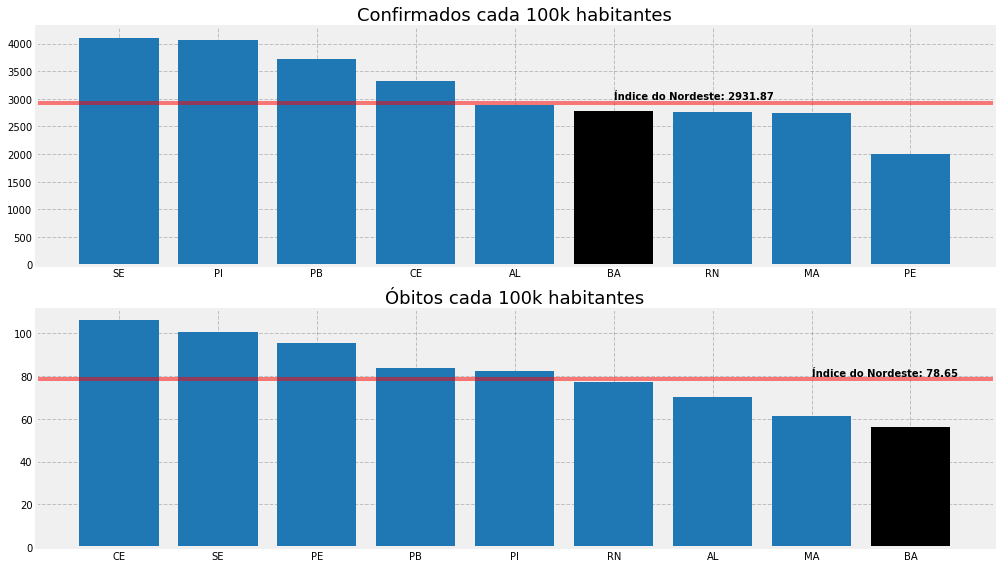

In [105]:
# para efeitos de comparação vamos calcular as taxas para toda a regiao do nordeste
ne_confirmados_100k = (ne_grupo['confirmed'].sum())/(ne_grupo['estimated_population'].sum()/100000)
ne_obitos_taxa_100k = (ne_grupo['deaths'].sum())/(ne_grupo['estimated_population'].sum()/100000)

# dispondo os estados de forma decrescente por ordem de confirmados cada 100 mil
ordem_confirmado_por100k = ne_grupo.sort_values('confirmed_per_100k', ascending=False)
# dispondo os estados do forma decrescente por ordem de óbitos cada 100 mil
ordem_obito_por100k = ne_grupo.sort_values('deaths_per_100k', ascending=False)

fig, ax = plt.subplots(2, figsize=(14,8), tight_layout=True)

d = {'PI':'blue', 'SE':'blue', 'PB':'blue', 'CE':'blue', 'AL':'blue', 'RN':'blue', 'MA':'blue', 'BA':'red', 'PE':'blue'}
ax[0].bar(ordem_confirmado_por100k.index, ordem_confirmado_por100k['confirmed_per_100k'],
         color=cores_ne_ba(ordem_confirmado_por100k.index))
ax[0].axhline(ne_confirmados_100k, color='red', alpha=0.5)
ax[0].text('BA', 3000, f'Índice do Nordeste: {round(ne_confirmados_100k,2)}', fontweight='bold')
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].set_title('Confirmados cada 100k habitantes', fontsize=18)

ax[1].bar(ordem_obito_por100k.index, ordem_obito_por100k['deaths_per_100k'], 
          color=cores_ne_ba(ordem_obito_por100k.index))
ax[1].axhline(ne_obitos_taxa_100k, color='red', alpha=0.5)
ax[1].text('MA', 80, f'Índice do Nordeste: {round(ne_obitos_taxa_100k,2)}', fontweight='bold')
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].set_title('Óbitos cada 100k habitantes', fontsize=18);


>A Bahia é uma das melhores colocadas tanto no número de confirmados quanto de óbitos para cada 100 mil habitantes. Apesar de ter a maior população da região, os números do estado ficam abaixo do índice regional. E Pernumbuco, apesar de mostrar um dos maiores índices de óbitos por 100 mil, aparece em último lugar no número de confirmados por 100 mil. Isso pode se dever a uma subnotificação do estado na identificação de novos casos confirmados. Será que o mesmo se repete no índice de mortalidade?

In [106]:
# calculando a taxa de mortalidade de toda a região
# este número será nosso parâmetro de comparação entre os estados
ne_taxa_mortalidade = round((ne_grupo['deaths'].sum()/ne_grupo['confirmed'].sum())*100, 2)

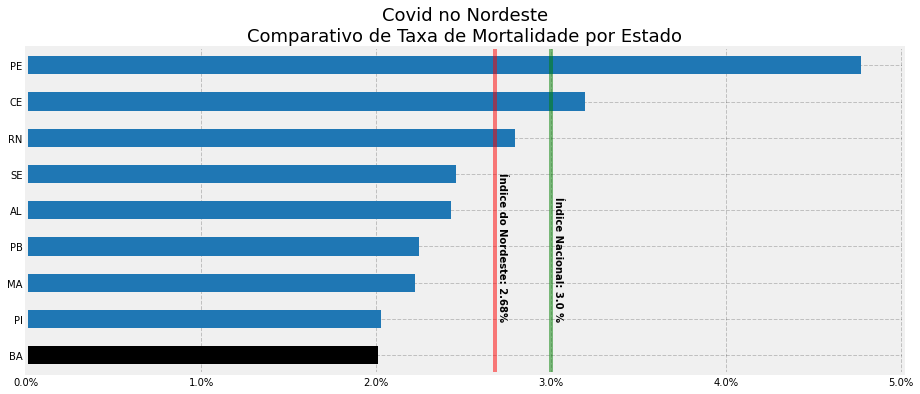

In [331]:
# agora vamos comparar a taxa de mortalidade por estado
tx_obito_ne = ne_grupo.sort_values('death_rate')['death_rate']
ax = tx_obito_ne.plot(kind='barh', figsize=(14,6), color=cores_ne_ba(tx_obito_ne.index))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}%'))
ax.axvline(regioes_deathrate_total, color='green', alpha=0.5)
ax.text(3.01, 1, f'Índice Nacional: {regioes_deathrate_total} %', rotation=-90, fontweight='bold')
ax.axvline(ne_taxa_mortalidade, color='red', alpha=0.5)
ax.text(2.69, 1, f'Índice do Nordeste: {ne_taxa_mortalidade} %', rotation=-90, fontweight='bold')
plt.title('Covid no Nordeste\nComparativo de Taxa de Mortalidade por Estado', fontsize=18)
plt.ylabel('')
plt.grid(ls='--', color='k', alpha=0.2)
plt.xticks(rotation=0);

>Vemos aqui que dois estados, Pernambuco e Ceará, se destacam negativamente apresentando índices alarmantes de mortalidade, inclusive maiores que as taxas nacionais. Estes mesmos estados também estiveram acima do índice regional em óbitos por 100 mil habitantes. Outros estados também repetem o padrão dos gráficos anteriores sobre o Nordeste e figuram altas taxas de mortalidade, como no caso de Sergipe, Alagoas e Paraíba.

>A Bahia novamente é um dos estados melhor posicionados, apresentando uma das menores taxas de mortalidade da região. Portanto, respondendo à pergunta do início desta seção, a Bahia tem pouca "participação" no salto da região Nordeste na taxa de mortalidade. Pernambuco e Ceará foram os que mais influenciaram o segundo lugar da região Nordeste em taxa de mortalidade.

Agora vamos dar mais um zoom na nossa análise e comparar a Bahia com dois dos estados mais afetados, Pernambuco e Ceará. Vamos tentar elucidas as seguintes questões:

- Esses três estados mantiveram a mesma média durante todo o período, desde o início da pandemia?
- Qual a tendência daqui para frente? Existe algum indício de segunda onda em algum desses estados?

In [108]:
# vamos calcular o número de novos casos diários de confirmados e óbitos
# vamos agrupar cada estado por data e depois tirar a diferença de cada dia em relação ao dia anterior
novos_casos_ba = cidades_ba.groupby('date').sum().diff()[['confirmed', 'deaths']]
novos_casos_ce = cidades_ce.groupby('date').sum().diff()[['confirmed', 'deaths']]
novos_casos_pe = cidades_pe.groupby('date').sum().diff()[['confirmed', 'deaths']]

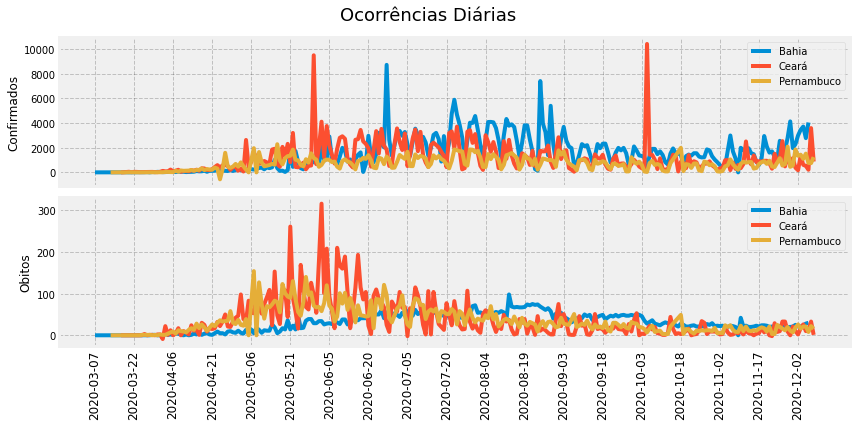

In [109]:
# criando o grafico usando programação orientada a objetos

fig, ax = plt.subplots(2, figsize=(12,6), tight_layout=True, sharex=True)

ax[0].plot(novos_casos_ba['confirmed'].index, novos_casos_ba['confirmed'].values, label='Bahia')
ax[0].plot(novos_casos_ce['confirmed'].index, novos_casos_ce['confirmed'].values, label='Ceará')
ax[0].plot(novos_casos_pe['confirmed'].index, novos_casos_pe['confirmed'].values, label='Pernambuco')
ax[0].set_ylabel('Confirmados')
ax[0].grid(ls='--', color='k', alpha=0.2)
ax[0].legend(loc='best')


ax[1].plot(novos_casos_ba['deaths'].index, novos_casos_ba['deaths'].values, label='Bahia')
ax[1].plot(novos_casos_ce['deaths'].index, novos_casos_ce['deaths'].values, label='Ceará')
ax[1].plot(novos_casos_pe['deaths'].index, novos_casos_pe['deaths'].values, label='Pernambuco')
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=15, offset=0))
ax[1].set_ylabel('Obitos')
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].legend(loc='best')

plt.xticks(rotation=90, fontsize=12)
plt.suptitle('Ocorrências Diárias', fontsize=18);

>Podemos ver que o Ceará foi o estado mais afetado nessa pandemia chegando no inicio de outubro a picos de mais de 10.000 casos confirmados por dia! Além disso, o estado amargou mais de 300 óbitos diários no final do mês de maio. Para efeitos de comparação, o recorde de mortes diárias na Bahia foi em meados de agosto, com 100 ocorrências. 

>Pernambuco manteve-se numa situação intermediária, chegando a registrar por volta de 150 óbitos diários no início de maio. Sobre os poucos casos confirmados do estado no gráfico superior, podemos inferir uma subnotificação devido ao contraste com o alto número de óbitos diários.

>No gráfico de novos casos confirmados, o final da linha na semana de 02-12-2020 indica uma subida acentuada para o estado da Bahia marcando possivelmente uma tendência para uma segunda onda da pandemia no estado. O que deve ter causado essa subida? Será que teve alguma subregião específica da Bahia que alavancou esses números? Vamos agora dar nosso último zoom e focar na Bahia e suas subdivisões.

### Situação da Bahia

Antes de patirmos para as microrregiões, vamos ver a situação do estado como um todo.

Quais foram os momentos de maior pico nesta pendemia? Qual o período mais grave com maior numero de confirmados e óbitos? Alguns jornais veicularam que o inverno poderia piorar a situação devido ao já comum agravamento de problemas respiratórios típicos da estação. Pode-se constatar isso durante o inverno na Bahia? Caso positivo, o pior já passou com a aproximação do verão ou realmente existe uma segunda onda vindo ai?

Para analisar a situação do estado vejamos a média móvel semanal para casos confirmados e óbitos.

In [216]:
# vamos agrupar por data para facilitar nossos cálculos
cidades_ba_group = cidades_ba.groupby('date').sum()

# excluindo colunas desnecessárias
cidades_ba_group.drop(['order_for_place', 'is_last', 'estimated_population',
                      'city_ibge_code'], axis=1, inplace=True)

# criando colunas com novas mortes e novos óbitos por dia
# vamos usar o método diff() para tirar a diferença entre cada linha e a respectiva anterior
cidades_ba_group['new_confirmed'] = cidades_ba_group['confirmed'].diff()
cidades_ba_group['new_deaths'] = cidades_ba_group['deaths'].diff()

# criando a coluna de media movel para casos confirmados e mortes
# usaremos o método rolling() para que agregue uma janela de cada 7 dias e aplique a media para cada janela
cidades_ba_group['mv_confirmed'] = cidades_ba_group['new_confirmed'].rolling(7).mean()
cidades_ba_group['mv_deaths'] = cidades_ba_group['new_deaths'].rolling(7).mean()

# verificando primeiras 10 linhas
cidades_ba_group.head(10)

,confirmed,deaths,confirmed_per_100k_inhabitants,death_rate,new_confirmed,new_deaths,mv_confirmed,mv_deaths
date,,,,,,,,
2020-03-06,1,0,0.16,0.00,nan,nan,nan,nan
2020-03-07,2,0,0.32,0.00,1.00,0.00,nan,nan
2020-03-09,2,0,0.32,0.00,0.00,0.00,nan,nan
2020-03-10,2,0,0.32,0.00,0.00,0.00,nan,nan
2020-03-11,3,0,0.48,0.00,1.00,0.00,nan,nan
2020-03-12,3,0,0.48,0.00,0.00,0.00,nan,nan
2020-03-13,7,0,0.75,0.00,4.00,0.00,nan,nan
2020-03-15,9,0,0.95,0.00,2.00,0.00,1.14,0.00
2020-03-16,10,0,1.61,0.00,1.00,0.00,1.14,0.00


<br>

Abaixo vamos plotar as médias móveis para casos confirmados e óbitos desde o início da pandemia.

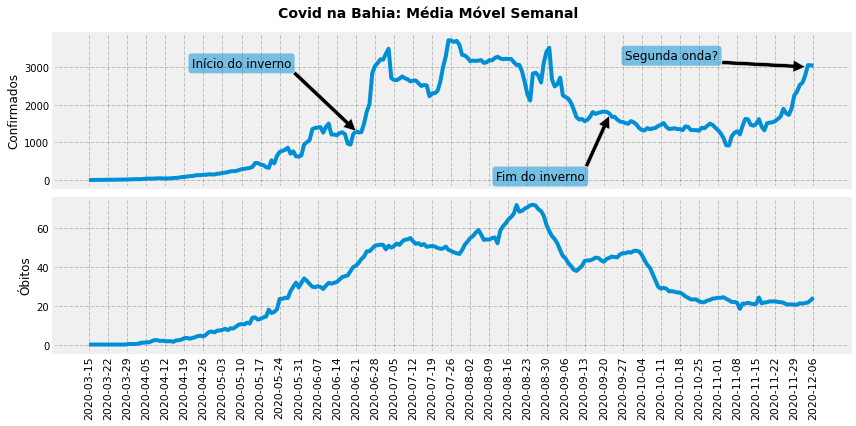

In [312]:
fig, ax = plt.subplots(2,figsize=(12,6), tight_layout=True, sharex=True)

ax[0].plot(cidades_ba_group['mv_confirmed'].index, cidades_ba_group['mv_confirmed'].values)
ax[0].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
#ax[0].axvline('2020-11-29', color='red', alpha=0.4)
#ax[0].axvline('2020-12-06', color='red', alpha=0.4)

ax[0].annotate('Início do inverno', xy=('2020-06-21', 1300), xytext=('2020-05-10', 3000), 
               arrowprops=dict(facecolor='black', shrink=1), ha='center', bbox=dict(boxstyle="round", alpha=0.5), size=12)
ax[0].annotate('Fim do inverno', xy=('2020-09-22', 1700), xytext=('2020-09-13', 0), 
               arrowprops=dict(facecolor='black', shrink=1), ha='right', bbox=dict(boxstyle="round", alpha=0.5), size=12)

ax[0].annotate('Segunda onda?', xy=('2020-12-03', 3000), xytext=('2020-11-01', 3200), 
               arrowprops=dict(facecolor='black', shrink=2), ha='right', bbox=dict(boxstyle="round", alpha=0.5), size=12)
ax[0].set_ylabel('Confirmados')
ax[0].grid(ls='--', color='k', alpha=0.2)


#ax[0].text('2020-12-22', 2000, 'Fonte: KOP Analytics. Dados do Brasil.io', rotation=-90, ha='center', va='center', size=7)

ax[1].plot(cidades_ba_group['mv_deaths'].index, cidades_ba_group['mv_deaths'].values)
ax[1].xaxis.set_major_locator(ticker.IndexLocator(base=7, offset=0))
ax[1].grid(ls='--', color='k', alpha=0.2)
ax[1].set_ylabel('Óbitos')

plt.xticks(rotation=90, fontsize=11)
plt.suptitle('Covid na Bahia: Média Móvel Semanal', fontsize=14, fontweight='bold');

plt.savefig('covid_bahia.png', dpi=200)

>Os dois gráficos de média móvel são bastante semelhantes no comportamento de acentuação da crise. Percebe-se um agravamento das notificações a partir da semana de 21 de junho com um abrandamento dos casos confirmados a partir de 20 de setembro. Alguns dias depois, a partir da semana de 04 de outubro, começa a se destacar uma queda para a média de óbitos.

>Coincidentemente o período de maior crise se deu justamente no inverno no hemisfério sul, que vai de 21 de junho a 22 de setembro. Pode ser devido ao inverno, mas também calhou de a estação ocorrer justamente no meio da pandemia. Mas, a partir de 22 de novembro a média móvel de casos confirmados voltar a subir vertiginosamente, para níveis parecidos aos de pico da pandemia. Essa possível segunda onda pode ser explicada pelas aglomerações durante as eleições e as saidinhas nos feriadões.

>Respondendo à pergunta do início desta seção, o pior já pode ter passado, mas, se medidas de isolamento social não forem retomadas, a crise pode se agravar novamente neste verão.

>Como podemos avaliar cada subdivisão da Bahia neste contexto?

<br>

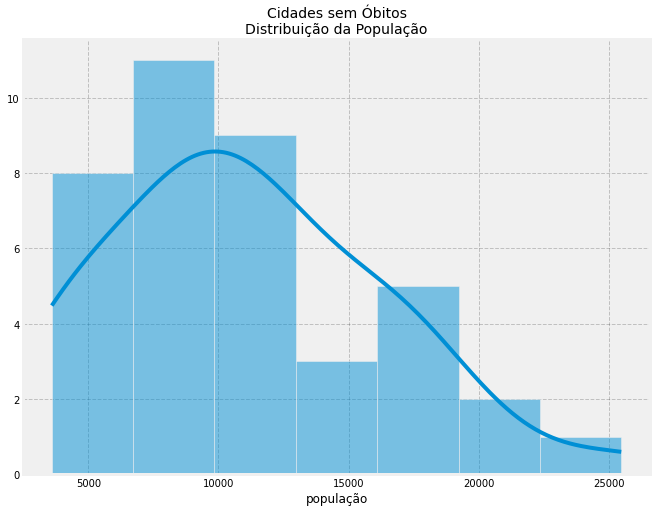

In [313]:
c = cidades_ba[cidades_ba['is_last']==True]
plt.figure(figsize=(10,8))
sns.histplot(c[c['deaths']==0]['estimated_population'], kde=True)
plt.title('Cidades sem Óbitos\nDistribuição da População', fontsize=14)
plt.xlabel('população')
plt.grid(ls='--', color='k', alpha=0.2)
plt.ylabel('');

### Microrregiões da Bahia

In [241]:
# vamos criar um dicionario com o nome das cidades-sede como chave e cidades da região como valores

micro_regioes = {'Barreiras':tuple(barreiras), 'Cotegipe':tuple(cotegipe), 'Sta Maria da Vitoria':tuple(sta_maria_vit),
                'Juazeiro':tuple(juazeiro), 'Paulo Afonso':tuple(paulo_afonso), 'Barra':tuple(barra), 
                 'B. Jesus da Lapa':tuple(bom_jesus_lapa), 'Senhor do Bonfim':tuple(senhor_bonfim), 
                 'Irece':tuple(irece), 'Jacobina':tuple(jacobina), 'Itaberaba':tuple(itaberada),
                 'Feira de Santana':tuple(feira_santana), 'Jeremoabo':tuple(jeremoabo), 
                 'Euclides da Cunha':tuple(euclides_cunha),'Ribeira do Pombal':tuple(rib_pombal), 
                 'Serrinha':tuple(serrinha), 'Alagoinhas':tuple(alagoinhas), 'Entre Rios':tuple(entre_rios),
                'Catu':tuple(catu), 'Sto Ant de Jesus':tuple(sto_antonio), 'Salvador':tuple(salvador), 
                 'Boquira':tuple(boquira), 'Seabra':tuple(seabra), 'Jequie':tuple(jequie), 
                 'Livramento do Brumado':tuple(liv_brumado), 'Guanambi':tuple(guanambi), 'Brumado':tuple(brumado), 
                'Vit da Conquista':tuple(vit_conquista), 'Itapetinga':tuple(itapetinga), 'Valenca':tuple(valenca), 
                 'Porto Seguro':tuple(porto_seguro),
                'Ilheus-Itabuna':tuple(ios_itabuna)}

# agora vamos criar um dicionário onde cada chave é uma cidade e seus valores são seus respectivos polos regionais

cidades_micro_regioes = {}
for cidade in cidades_ba['city'].unique():
    for sede in micro_regioes.keys():
        if cidade in micro_regioes[sede]:
            cidades_micro_regioes[cidade] = sede
        else:
            x = 'NA'
            
# criando a nova coluna para indicar na tabela a qual subdivisão cada cidade pertence

cidades_ba['micro_region'] = cidades_ba['city'].map(cidades_micro_regioes)

In [244]:
# verificando se alguma cidade ficou sem denominação de microrregião
cidades_ba[cidades_ba['micro_region'].isna()]['city'].unique()

array([], dtype=object)

In [118]:
cidades_ba.groupby('city').sum()['confirmed_per_100k_inhabitants'].mean()

204349.5765743165

In [248]:
# vamos ver como ficou nossa nova coluna
cidades_ba[['city', 'micro_region']].sample(5)

,city,micro_region
196661,Itamaraju,Porto Seguro
194350,Itabela,Porto Seguro
207957,Madre de Deus,Salvador
244331,Wagner,Seabra
242742,Valença,Valenca


In [255]:
# vamos criar o novo dataframe focando nos números de cada microrregião
# usaremos o dataframe cidades_ba como base

micro_reg = cidades_ba[cidades_ba['is_last']==True].groupby('micro_region').sum()
micro_reg['death_rate'] = (micro_reg['deaths'] / micro_reg['confirmed'])*100
micro_reg['confirmed_per_100k_inhabitants'] = micro_reg['confirmed']/(micro_reg['estimated_population']/100000)
micro_reg

,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
micro_region,,,,,,,,
Alagoinhas,8700,147,1937,9.00,328745.00,26187185.00,2646.43,1.69
B. Jesus da Lapa,1792,32,1152,6.00,181009.00,17506399.00,990.01,1.79
Barra,2509,46,1504,7.00,183168.00,20413477.00,1369.78,1.83
Barreiras,12553,177,1461,7.00,347122.00,20398862.00,3616.31,1.41
Boquira,1022,15,2033,11.00,194269.00,32057091.00,526.07,1.47
Brumado,5420,65,2832,14.00,226484.00,40840364.00,2393.11,1.20
Catu,5920,107,1573,7.00,231007.00,20431942.00,2562.69,1.81
Cotegipe,2056,27,1446,8.00,119183.00,23338139.00,1725.08,1.31
Entre Rios,1717,27,1056,5.00,125586.00,14554619.00,1367.19,1.57


>Todas as microrregiões da Bahia foram incluídas com sucesso

Vamos analisar como estão os índices de cada subdivisão, a começar pelo total de confirmados para cada 100 mil habitantes.

In [372]:
# criando uma tabela que considere somente os últimos boletins para obtermos números atualizados de cada cidade
cidades_ba_ultimo = cidades_ba[cidades_ba['is_last']==True]

# calculando o índice da Bahia de confirmados para cada 100 mil habitantes
# usaremos este número para plotar no gráfico e servir como benchmark para comparação entre as regiões
bahia_confirmados_100k = cidades_ba_ultimo['confirmed'].sum()/(cidades_ba_ultimo['estimated_population'].sum()/100000)
bahia_confirmados_100k

2785.682108341816

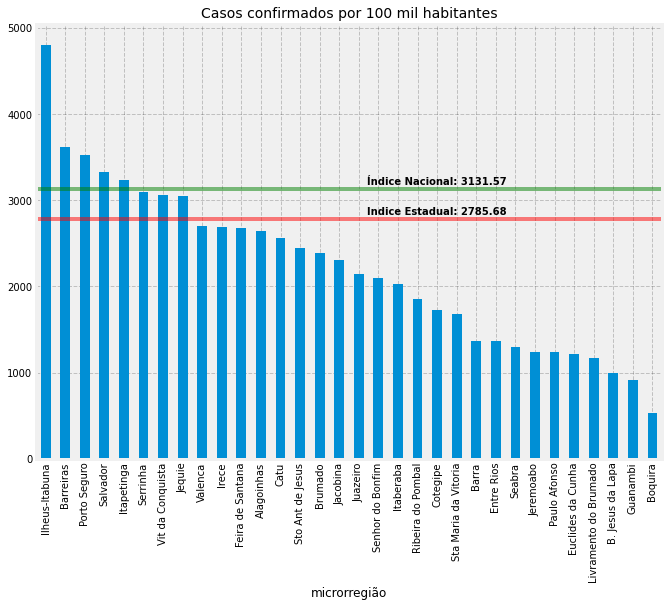

In [337]:
# plotando no gráfico de barras de forma ordenada
ax = micro_reg['confirmed_per_100k_inhabitants'].sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
# inserindo o benchmark para comparação
ax.axhline(bahia_confirmados_100k, alpha=0.5, color='red')
ax.axhline(regioes_conf_por_100k, alpha=0.5, color='green')
ax.text(20, 2830, f'Indice Estadual: {bahia_confirmados_100k.round(2)}', fontweight='bold', ha='center')
ax.text(20, 3180, f'Índice Nacional: {round(regioes_conf_por_100k,2)}', fontweight='bold', ha='center')
ax.grid(ls='--')
ax.set_xlabel('microrregião')
ax.grid(ls='--', color='k', alpha=0.2)
ax.set_title('Casos confirmados por 100 mil habitantes', fontsize=14);

>Vemos claramente que existem algumas regiões puxando os índices estaduais para cima. São 8 regiões no total com números superiores aos do estado e 5 dessas em situação gravíssima, muito acima do índice nacional. Destaque negativo para a região de Ilhéus-Itabuna, chegando a beirar a marcar dos 5000 casos para cada 100.000 habitantes. É um número que passa muito do nacional, que tem 3.100 casos, e muito superior ao segundo lugar estudal, Barrerias, que tem por volta de 3.500 casos por 100.000 habitantes.

>Será que essas mesmas regiões continuam apresentando números precoupantes para a taxa de mortalidade? Veremos no gráfico a seguir

In [379]:
# calculando a taxa de mortalidade estadual para criar o benchmark
bahia_death_rate = round((cidades_ba_ultimo['deaths'].sum()/cidades_ba_ultimo['confirmed'].sum())*100, 2)

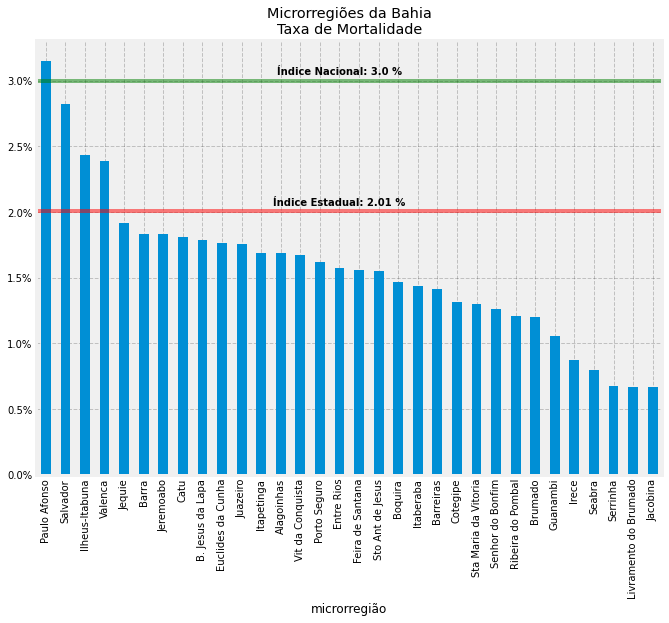

In [380]:
ax = (micro_reg['death_rate']).sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}%'))
ax.axhline(regioes_deathrate_total, color='green', alpha=0.5)
ax.text(15, 3.05, f'Índice Nacional: {regioes_deathrate_total} %', fontweight='bold', ha='center')
ax.axhline(bahia_death_rate, color='red', alpha=0.5)
ax.text(15, 2.05, f'Índice Estadual: {bahia_death_rate} %', fontweight='bold', ha='center')
ax.set_title('Microrregiões da Bahia\nTaxa de Mortalidade')
ax.set_xlabel('microrregião')
ax.grid(ls='--', color='k', alpha=0.2);

>De início já notamos logo o alto índice da região de Paulo Afonso. A região supera inclusive o índice nacional de 3%. Em contraste com o número de confirmados para cada 100.000 habitantes, que esta região mostrou baixo, podemos supor que está havendo uma subnotificação.

>Analisando em conjunto os dois gráficos (confirmados por 100 mil e taxa de óbitos), podemos afimar que as regiões de Ilhéus-Itabuna e Salvador são as mais afetadas da Bahia. Uma das explicações para isso pode ser pelo fato de essas regiões serem as mais turísticas do estado, com grande fluxo de pessoas. Inclusive, os primeiro casos registrados em Ilhéus-Itabuna foi na cidade turística de Itacaré, em convidadss de um casamento com pessoas oriundas de outros estados e países.

>Será que o fator turismo e fluxo de pessoas poderiam de fato explicar a grande incidência nessas regiões da Bahia? Seria interessante fazermos essa análise através do mapa da Bahia. São 32 subdivisões e um mapa é o melhor modelo de plotagem para visualizarmos e nos ajudar em conclusões.

### Visualizando com mapa...

In [384]:
# usaremos o folium para plotar um mapa coroplético 
# vamos utilizar esse arquivo geojson de todas as cidades da Bahia
# esses arquivos trazem informações das divisas de cada cidade
bahia = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-29-mun.json'
bahia_geo = pd.read_json(bahia)

In [385]:
# vamos substituir o nome de algumas cidades para que fique idêntico aos nomes no arquivo geojson
# sem essa padronização as cidades com grafias diferentes não seriam encontradas e plotadas
cidades_ba_ultimo['city'].replace({'Iuiu':'Iuiú', 'Muquém do São Francisco':'Muquém de São Francisco', 'Araçás':'Araças'}, inplace=True)

# criando algumas colunas para nos ajudar nas análises
cidades_ba_ultimo['confirmados_na_reg'] = cidades_ba_ultimo.groupby('micro_region')['confirmed', 'estimated_population'].transform('sum')['confirmed']
cidades_ba_ultimo['pop_da_reg'] = cidades_ba_ultimo.groupby('micro_region')['confirmed', 'estimated_population'].transform('sum')['estimated_population']
cidades_ba_ultimo['mortes_na_reg'] = cidades_ba_ultimo.groupby('micro_region')['deaths'].transform('sum')
cidades_ba_ultimo['confirmados_por_100_reg'] = cidades_ba_ultimo['confirmados_na_reg']/(cidades_ba_ultimo['pop_da_reg']/100000)
cidades_ba_ultimo['mortes_taxa_reg'] = (cidades_ba_ultimo['mortes_na_reg']/cidades_ba_ultimo['confirmados_na_reg'])*100

In [754]:

mapa = folium.Map(location=[-12.5797, -41.7007], zoom_start=6, tiles='cartodbpositron')
folium.Choropleth(
    geo_data=bahia,
    data=cidades_ba_ultimo,
    bins=9,
    columns=['city', 'mortes_taxa_reg'],
    key_on='feature.properties.name',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Taxa de Mortalidade',
    highlight=True, tiles='cartodbpositron'
).add_to(mapa)

marker_cluster = MarkerCluster().add_to(mapa)



# nos nomes das microrregiões abreviamos os nomes de algumas cidades
# vamos tratar dessas correcoes com um dicionario e uma função
cidades_corretas = {'B. Jesus da Lapa':'Bom Jesus da Lapa', 'Ilheus-Itabuna':'Ilhéus', 'Irece':'Irecê',
     'Jequie':'Jequié', 'Sta Maria da Vitoria':'Santa Maria da Vitória', 'Sto Ant de Jesus':'Santo Antônio de Jesus',
     'Valenca':'Valença', 'Vit da Conquista':'Vitória da Conquista', 'Livramento do Brumado':'Livramento de Nossa Senhora'}

indice = []
for polo in micro_reg.index.to_list():
    for cid in cidades_corretas.keys():
        if polo == cid:
            polo = cidades_corretas[cid]
        else:
            polo = polo
    indice.append(polo)

# agora vamos criar função para tirar o acento dos nomes das cidades
# o encodamento do folium não reconhece acentos
def sem_acento(cidade):
    if cidade == 'Vitória da Conquista':
        return 'Vitoria da Conquista'
    if cidade == 'Irecê':
        return 'Irece'
    if cidade == 'Ilhéus':
        return 'Ilheus'
    if cidade == 'Santa Maria da Vitória':
        return 'Santa Maria da Vitoria'
    if cidade == 'Valença':
        return 'Valenca'
    if cidade == 'Jequié':
        return 'Jequie'
    if cidade == 'Santo Antônio de Jesus':
        return 'Santo Antonio de Jesus'
    else:
        return cidade 


    
coord = []
for i in bahia_geo['features']:
    for cidade in indice:
        if [i][0]['properties']['name'] == cidade:
            coord.append(i['geometry']['coordinates'][0][7])
            
            taxa = round(float(cidades_ba_ultimo[cidades_ba_ultimo['city']==cidade]['mortes_taxa_reg']), 2)
            
            folium.Marker(i['geometry']['coordinates'][0][7][::-1], popup=f'''
            <i>Taxa de Mortalidade: {x} </i>
            ''',
            tooltip=f'<strong>Microrregiao: {sem_acento(cidade)}</strong><br> Taxa de Mortalidade: {taxa}', 
                          charset='utf-8').add_to(marker_cluster)

mapa

In [441]:
cidades_ba

,date,state,city,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region,micro_region
158437,2020-12-06,BA,Abaré,144,0,206,True,20347.00,2900207.00,707.72,0.00,Nordeste,Paulo Afonso
158438,2020-12-05,BA,Abaré,142,0,205,False,20347.00,2900207.00,697.89,0.00,Nordeste,Paulo Afonso
158439,2020-12-04,BA,Abaré,138,0,204,False,20347.00,2900207.00,678.23,0.00,Nordeste,Paulo Afonso
158440,2020-12-03,BA,Abaré,138,0,203,False,20347.00,2900207.00,678.23,0.00,Nordeste,Paulo Afonso
158441,2020-12-02,BA,Abaré,138,0,202,False,20347.00,2900207.00,678.23,0.00,Nordeste,Paulo Afonso
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245384,2020-06-13,BA,Érico Cardoso,1,0,5,False,10560.00,2900504.00,9.47,0.00,Nordeste,Livramento do Brumado
245385,2020-06-12,BA,Érico Cardoso,1,0,4,False,10560.00,2900504.00,9.47,0.00,Nordeste,Livramento do Brumado
245386,2020-06-11,BA,Érico Cardoso,1,0,3,False,10560.00,2900504.00,9.47,0.00,Nordeste,Livramento do Brumado
245387,2020-06-10,BA,Érico Cardoso,0,0,2,False,10560.00,2900504.00,0.00,0.00,Nordeste,Livramento do Brumado


In [746]:
for _, row in bahia_geo.iterrows():
    print(row['features']['geometry']['coordinates'][0])

[[-41.6435970116, -13.1864418638], [-41.6407700317, -13.1901144494], [-41.6362434028, -13.1895536267], [-41.6161239546, -13.2127400473], [-41.6090976043, -13.2141226139], [-41.5984592942, -13.2297607102], [-41.5898510595, -13.2679292143], [-41.596353852, -13.2699157019], [-41.5988639316, -13.2698308056], [-41.6025492508, -13.270642831], [-41.6023545895, -13.2833136891], [-41.6000149817, -13.2935425496], [-41.595012544, -13.2962400922], [-41.6000675875, -13.3034951045], [-41.5982394563, -13.3079729508], [-41.6046799328, -13.3096084083], [-41.601323966, -13.3132502549], [-41.6045146254, -13.3208724361], [-41.6088770332, -13.3225256319], [-41.6074887015, -13.3378611391], [-41.6124933772, -13.3416274546], [-41.6106262164, -13.3541799262], [-41.6080420715, -13.3550698304], [-41.6097703074, -13.3838507674], [-41.6059605312, -13.4102404401], [-41.6024688524, -13.4152265829], [-41.6061201623, -13.4170824936], [-41.605272459, -13.4247826163], [-41.6112995524, -13.4278533786], [-41.6177961591, -

[[-39.1774601862, -11.9951811101], [-39.1722227623, -11.995783091], [-39.1397222823, -11.9919766516], [-39.1349110233, -12.0038305694], [-39.1137523931, -12.0604232512], [-39.0927189438, -12.0600677609], [-39.0598690667, -12.0593143119], [-39.061672497, -12.0417259186], [-39.0573764556, -12.0397716876], [-39.0573232143, -12.0350668928], [-39.0635317113, -12.0187991067], [-39.0587262081, -12.0097211909], [-39.0562389013, -12.0061273025], [-39.0540394609, -12.0114709566], [-39.0334878884, -12.061388663], [-39.0081108436, -12.0624064791], [-38.9992427542, -12.0627615461], [-38.9881624898, -12.0491439391], [-38.9878692899, -12.0487842403], [-38.9839342935, -12.0439492937], [-38.9703664686, -12.0272746785], [-38.9631287337, -12.0183810152], [-38.9520938831, -12.0167875584], [-38.8992893433, -12.009158164], [-38.9022613013, -12.0115044927], [-38.9002416987, -12.0194223731], [-38.9042612467, -12.0314697351], [-38.8982936608, -12.0497376731], [-38.8981583276, -12.0498523415], [-38.8932826317, 

[[-42.9208754628, -12.0240540339], [-42.9027506937, -12.0365285525], [-42.888921937, -12.0217309336], [-42.8132176668, -11.9406906348], [-42.8038241213, -11.9501594287], [-42.7980219776, -11.9627894613], [-42.7905403437, -11.9647089369], [-42.7801360276, -11.9722482945], [-42.7667522913, -11.9617841533], [-42.7626647623, -11.9593974926], [-42.7552958009, -11.9671827361], [-42.7279135041, -11.9791092324], [-42.7032525742, -12.0027677408], [-42.6884430693, -12.0100147692], [-42.6738275056, -12.0382655141], [-42.673584395, -12.0385577548], [-42.6696542742, -12.0455443136], [-42.6718187623, -12.0586144954], [-42.6583294408, -12.0705190607], [-42.6477700935, -12.0687644684], [-42.6365187652, -12.0759633124], [-42.6248298366, -12.0785656168], [-42.6172431507, -12.1050980917], [-42.6217984863, -12.1150501073], [-42.6198169673, -12.1333968133], [-42.6090855123, -12.1535712204], [-42.614213972900004, -12.1596315032], [-42.6136585185, -12.167266175], [-42.6060389048, -12.1666390187], [-42.600597

In [751]:
teste = cidades_ba[['date', 'city', 'confirmed']]

In [764]:
c = []
for city in teste['city'].values:
    for i in bahia_geo['features']:
        if [i]['properties']['name'] == city:
            c.append(i['geometry']['coordinates'][0][7])
    

TypeError: list indices must be integers or slices, not str

In [795]:
def create_geojson_features(df1, df2):
    features = []
    
    for indice, linha in df1.iterrows():
        for i, row in df2.iterrows():
            if linha['city'] == row['features']['properties']['name']:
                feature = {'type': 'Feature', 'geometry': {'type':'Point',
                                                           'coordinates':row['features']['geometry']['coordinates'][0][0]
                }, 'properties': {'time': linha['date'].__str__(), 'style': {'color' : ''}, 'icon': 'circle',
                                  'iconstyle':{'fillColor': '#53c688', 'fillOpacity': 0.8, 'stroke': 'true',
                                               'radius': linha['confirmed']}}}
                features.append(feature)
    return features

In [ ]:
s_geojason = create_geojson_features(teste, bahia_geo)

In [794]:
teste

,date,city,confirmed
158437,2020-12-06,Abaré,144
158438,2020-12-05,Abaré,142
158439,2020-12-04,Abaré,138
158440,2020-12-03,Abaré,138
158441,2020-12-02,Abaré,138
...,...,...,...
245384,2020-06-13,Érico Cardoso,1
245385,2020-06-12,Érico Cardoso,1
245386,2020-06-11,Érico Cardoso,1
245387,2020-06-10,Érico Cardoso,0


In [793]:
for i, row in bahia_geo.iterrows():
    print(row['features']['geometry']['coordinates'][0][0])

[-41.6435970116, -13.1864418638]
[-39.2281616789, -8.7099003663]
[-37.9823291165, -11.5918719821]
[-38.0584556422, -10.4351725996]
[-38.7169001757, -11.6912086527]
[-42.1079910265, -13.2820087719]
[-39.7935997029, -14.0666810163]
[-38.4047280112, -11.9255999241]
[-39.4327454826, -17.2816018562]
[-39.719179956, -14.6016775964]
[-39.5748585652, -12.9590671194]
[-38.6376389571, -12.476318224]
[-41.3862115118, -11.3676900179]
[-40.6418036329, -14.5698300147]
[-40.9734307718, -12.4858263246]
[-39.8058571833, -9.9393251936]
[-44.6543317354, -11.7532127977]
[-39.1225371824, -12.1992177323]
[-38.1880977448, -10.4209597615]
[-39.1387676419, -12.2783748587]
[-40.2351772179, -10.5210172859]
[-38.2138524483, -11.6085676367]
[-39.7242389959, -13.7478578009]
[-41.3346767118, -14.0935537661]
[-38.2149050842, -12.0092854286]
[-39.2685536248, -10.9867642192]
[-38.5268663133, -11.9376779518]
[-39.3100324223, -15.1832299621]
[-39.0923335598, -13.0403294753]
[-39.6242253133, -14.2779090296]
[-44.531072968

[-41.5328955762, -12.3546467532]
[-42.1855709485, -13.291239023]
[-43.2128124404, -12.3270019482]
[-37.8765109499, -10.4405652254]
[-39.6315942753, -15.3013037166]
[-38.4512168755, -9.4043820201]
[-39.5349187203, -11.8112702015]
[-38.5788105325, -12.1438922144]
[-37.9571147658, -9.9708581248]
[-41.686845898, -13.1131878868]
[-42.6065706261, -9.7550233459]
[-42.6484999842, -14.2934248005]
[-40.276493197, -10.6277410556]
[-39.8099072178, -11.8245577527]
[-39.2702067756, -13.7014942192]
[-41.7503810795, -14.8655324686]
[-40.6782964139, -11.5513385358]
[-40.1345039188, -13.2127966781]
[-40.3246127396, -14.8793102263]
[-40.2129145209, -14.4512695693]
[-38.1471695549, -12.2833130621]
[-40.2005709305, -10.8164124744]
[-39.0058579015, -16.3397843761]
[-39.7323375921, -15.5562833731]
[-39.3093256053, -16.8881923788]
[-41.9079133533, -11.1766449692]
[-41.6660516753, -14.4860359886]
[-39.4102899471, -13.326995469]
[-39.5512172189, -10.8454360237]
[-38.7055709141, -10.6185950252]
[-40.0280287246, 

In [778]:
for i, row in bahia_geo.iterrows():
    print(row['features']['properties']['name'])

Abaíra
Abaré
Acajutiba
Adustina
Água Fria
Érico Cardoso
Aiquara
Alagoinhas
Alcobaça
Almadina
Amargosa
Amélia Rodrigues
América Dourada
Anagé
Andaraí
Andorinha
Angical
Anguera
Antas
Antônio Cardoso
Antônio Gonçalves
Aporá
Apuarema
Aracatu
Araças
Araci
Aramari
Arataca
Aratuípe
Aurelino Leal
Baianópolis
Baixa Grande
Banzaê
Barra
Barra da Estiva
Barra do Choça
Barra do Mendes
Barra do Rocha
Barreiras
Barro Alto
Barrocas
Barro Preto
Belmonte
Belo Campo
Biritinga
Boa Nova
Boa Vista do Tupim
Bom Jesus da Lapa
Bom Jesus da Serra
Boninal
Bonito
Boquira
Botuporã
Brejões
Brejolândia
Brotas de Macaúbas
Brumado
Buerarema
Buritirama
Caatiba
Cabaceiras do Paraguaçu
Cachoeira
Caculé
Caém
Caetanos
Caetité
Cafarnaum
Cairu
Caldeirão Grande
Camacan
Camaçari
Camamu
Campo Alegre de Lourdes
Campo Formoso
Canápolis
Canarana
Canavieiras
Candeal
Candeias
Candiba
Cândido Sales
Cansanção
Canudos
Capela do Alto Alegre
Capim Grosso
Caraíbas
Caravelas
Cardeal da Silva
Carinhanha
Casa Nova
Castro Alves
Catolândia
Cat

In [733]:

mapa = folium.Map(location=[-12.5797, -41.7007], zoom_start=6)

TimestampedGeoJson(features,
                  period = 'P1D',
                  duration = 'PT1M',
                  transition_time = 1000,
                  auto_play = True).add_to(mapa)


mapa

NameError: name 'features' is not defined